In [ ]:
import torch
import numpy as np
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

sdf = pd.read_csv('../data/sample_data.csv', index_col = 0)

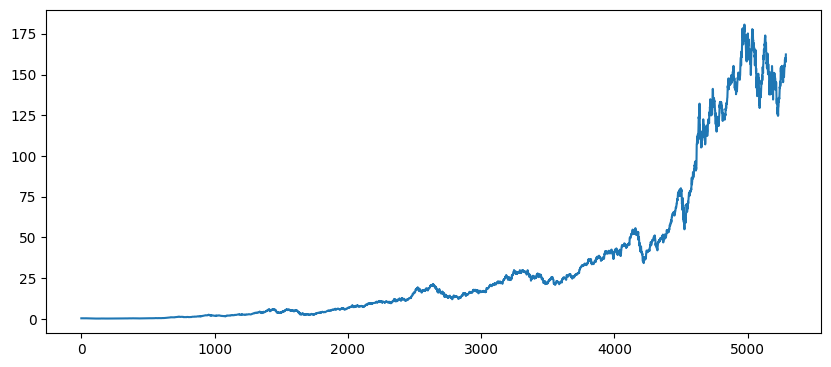

In [ ]:
plt.figure(figsize=[10,4.2])
plt.plot(sdf['AAPL_Price'].to_numpy())
plt.show()

In [ ]:
ndt = np.array(sdf)
dt = 100*(np.log(ndt[1:,:])-np.log(ndt[:-1,:]))
dt = pd.DataFrame(dt, index=sdf.iloc[1:,:].index, columns=sdf.columns)
display(dt)

,AAPL_Price,ABC_Price,ABIO_Price,ADBE_Price,ADI_Price,ADM_Price,ADP_Price,ADSK_Price,AEE_Price,AEP_Price,...,WM_Price,WMB_Price,WMT_Price,WY_Price,XEL_Price,XOM_Price,XRAY_Price,XRX_Price,YUM_Price,ZION_Price
2002/4/2,-1.607440,-0.521959,-2.672306,-4.842094,-5.433252,-0.071055,-0.965385,-2.481649,0.071126,1.153808,...,-2.222292,1.752913,-1.063457,-0.857179,1.650298,1.247015,-0.575564,-3.489754,1.094754,-0.287957
2002/4/3,-1.338501,-1.745013,-13.353139,-0.077533,-2.796167,-2.373363,-3.044086,-4.439147,0.023701,-0.043299,...,-0.112374,-4.614558,-0.561517,0.275740,0.233571,-1.566944,-1.050065,-0.093503,-0.974458,-1.728488
2002/4/4,4.728711,-0.103632,-2.409755,-0.935316,1.151158,3.010988,0.000000,0.436832,0.354836,2.078727,...,-0.150096,-0.564917,1.153726,-1.222177,0.531260,-1.243680,2.170728,1.208770,0.496927,-1.355625
2002/4/5,-0.644705,-2.185677,-0.244197,-1.155188,-0.187008,-0.993623,0.362955,-1.293022,-0.426011,-0.702365,...,-1.399196,-2.514956,-0.236445,1.448735,-2.021939,-1.212426,-0.272157,-2.811821,1.105009,0.314460
2002/4/8,-0.730297,1.546915,2.415576,2.580626,0.116990,1.627197,1.313791,1.224163,0.685346,0.638722,...,0.076111,0.223107,1.076343,-0.778766,-0.361035,1.420770,4.137757,-1.147248,1.426818,0.833764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/3/24,0.827129,3.566468,2.433210,1.602269,-0.933345,1.950772,0.238462,-0.458441,4.167016,4.218381,...,2.464412,1.542811,0.814314,0.844488,3.476995,0.115971,1.324167,0.479612,0.117414,2.872725
2023/3/27,-1.236949,0.178855,-0.481929,-0.483886,-1.567985,1.477092,0.107352,-0.736901,-0.059517,-0.607965,...,-0.571359,0.658924,1.657551,0.559051,-0.397436,2.168913,0.748857,2.564244,0.359200,3.751743
2023/3/28,-0.398826,0.832569,-1.951281,0.066975,-0.635232,1.023685,-0.098017,-0.747438,0.688187,0.428215,...,0.804158,-0.207609,-0.389185,-0.980403,0.168339,1.239918,0.584490,-2.427633,0.163563,2.091847
2023/3/29,1.959745,0.612048,-0.990107,1.530808,2.988656,0.558583,2.649619,0.953517,1.688400,1.307060,...,1.423731,1.376007,0.430792,2.261359,1.728100,1.703110,-0.079489,1.624955,-0.070060,3.574737


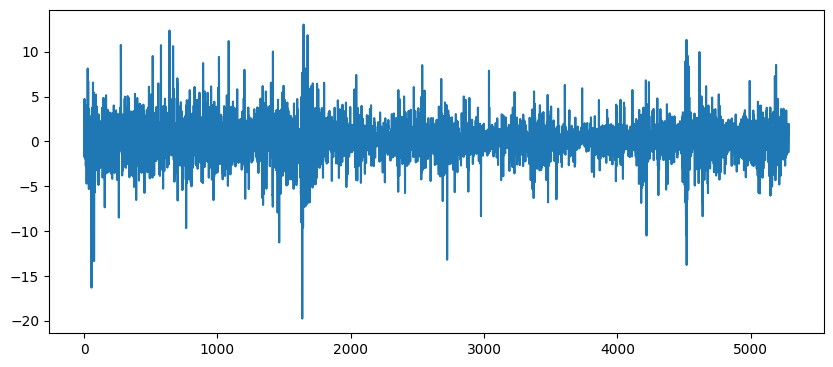

In [ ]:
plt.figure(figsize=[10,4.2])
plt.plot(dt['AAPL_Price'].to_numpy())
plt.show()

In [ ]:
dt.describe()

,AAPL_Price,ABC_Price,ABIO_Price,ADBE_Price,ADI_Price,ADM_Price,ADP_Price,ADSK_Price,AEE_Price,AEP_Price,...,WM_Price,WMB_Price,WMT_Price,WY_Price,XEL_Price,XOM_Price,XRAY_Price,XRX_Price,YUM_Price,ZION_Price
count,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,...,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000
mean,0.114986,0.046981,-0.219777,0.055577,0.035625,0.041535,0.038706,0.054281,0.031153,0.029640,...,0.043870,0.023216,0.024580,0.018058,0.034519,0.030081,0.016631,-0.003872,0.054028,-0.006040
std,2.157927,1.675179,6.570473,2.307327,2.133377,1.904325,1.536981,2.498060,1.383972,1.540007,...,1.372999,3.596700,1.321078,2.110361,1.716555,1.674299,1.719638,2.466970,1.716915,2.864594
min,-19.746947,-13.962389,-157.425841,-35.322264,-18.170049,-18.426545,-26.891544,-20.723969,-19.085819,-25.857365,...,-11.789672,-94.280184,-12.076467,-25.713169,-45.834677,-15.027119,-20.630662,-28.768217,-23.285430,-29.739450
25%,-0.920002,-0.740394,-2.387024,-0.971576,-1.007183,-0.841682,-0.629829,-1.138307,-0.611151,-0.630443,...,-0.560271,-1.094702,-0.617477,-0.952712,-0.573840,-0.762471,-0.772683,-1.106309,-0.726861,-1.099288
50%,0.100024,0.076242,-0.135965,0.102774,0.054938,0.082239,0.058303,0.091734,0.070275,0.086424,...,0.071485,0.075087,0.037786,0.060424,0.063593,0.039446,0.050229,0.049504,0.065539,0.037299
75%,1.228422,0.913976,1.823575,1.160127,1.072299,0.969619,0.776001,1.296834,0.731578,0.736543,...,0.675054,1.219112,0.655922,1.037478,0.729843,0.854719,0.859464,1.153667,0.844174,1.106859
max,13.019398,11.167685,158.171535,16.313278,14.536540,15.988659,11.178479,15.013000,16.382999,18.100151,...,16.529059,69.818367,11.072266,22.566442,21.079807,15.863134,16.253107,18.069965,20.903151,24.339184


In [ ]:
x_data = dt.loc['2002/11/26':'2023/3/29'].to_numpy()
y_data = dt.loc['2002/11/27':'2023/3/30'].to_numpy()

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F

class LSTM_seq2seq(nn.Module):
    def __init__(self, wordvec_size, dropout):
        super(LSTM_seq2seq, self).__init__()
        self.D = wordvec_size
        self.lstm = nn.LSTM(input_size=64, hidden_size=64, num_layers=3, dropout=dropout, batch_first=True)
        self.af1 = nn.Linear(self.D, 128, bias = False)
        self.af2 = nn.Linear(128, 64, bias = False)
        self.af3 = nn.Linear(64, 128, bias = True)
        self.af4 = nn.Linear(128, self.D, bias = False)
        self.drp1 = nn.Dropout(p=dropout)
        self.drp2 = nn.Dropout(p=dropout)
        self.drp3 = nn.Dropout(p=dropout)
        self.W1 = nn.Linear(self.D, self.D, bias = False)
        nn.init.zeros_(self.W1.weight)
        self.b = nn.Parameter(torch.zeros(self.D, 3).to(device))

    def trfm(self, x, index):
        V = self.W1.weight - torch.diag(torch.diagonal(self.W1.weight))
        w = torch.matmul(x, V.T)
        if index < 0:
          return x-w
        else:
          J = torch.log(torch.abs(torch.det(torch.eye(self.D).to(device) - V)))
          return x - w, J, torch.sum(torch.abs(V))

    def sub(self, y, h=None, vol=None):
        SQ = []
        w = []
        vc = vol if vol is not None else y.mean(dim=1)
        for t in range(y.shape[1]):
          w.append((y[:,t,:]/vc).unsqueeze(1))
          vc = torch.exp(self.b[:,0]) + torch.exp(self.b[:,1]) * vc + torch.exp(self.b[:,2]) * y[:,t,:]
          SQ.append(vc.unsqueeze(1))
        SQ = torch.cat(SQ, dim = 1)
        w = torch.cat(w, dim = 1)
        w = F.relu(self.af1(w))
        w = self.drp1(w)
        w = F.relu(self.af2(w))
        w = self.drp2(w)
        r, h = self.lstm(w, h)
        r = F.relu(self.af3(r))
        r = self.drp3(r)
        r = self.af4(r)
        score = torch.exp(r) * SQ
        return score, h, vc

    def forward(self, x, h=None, vol=None):
        score, h, vol = self.sub(x, h, vol)
        return score, h, vol

In [ ]:
class EarlyStopping:
    """earlystoppingクラス"""

    def __init__(self, patience=5, verbose=False, path='checkpoint_model.pth'):
        """引数：最小値の非更新数カウンタ、表示設定、モデル格納path"""

        self.patience = patience    #設定ストップカウンタ
        self.verbose = verbose      #表示の有無
        self.counter = 0            #現在のカウンタ値
        self.best_score = None      #ベストスコア
        self.early_stop = False     #ストップフラグ
        self.val_loss_min = np.inf   #前回のベストスコア記憶用
        self.path = path             #ベストモデル格納path

    def __call__(self, val_loss, model):
        """
        特殊(call)メソッド
        実際に学習ループ内で最小lossを更新したか否かを計算させる部分
        """
        score = -val_loss

        if self.best_score is None:  #1Epoch目の処理
            self.best_score = score   #1Epoch目はそのままベストスコアとして記録する
            self.checkpoint(val_loss, model)  #記録後にモデルを保存してスコア表示する
        elif score < self.best_score:  # ベストスコアを更新できなかった場合
            self.counter += 1   #ストップカウンタを+1
            if self.verbose:  #表示を有効にした場合は経過を表示
                print(f'\tEarlyStopping counter: {self.counter} out of {self.patience}')  #現在のカウンタを表示する
            if self.counter >= self.patience:  #設定カウントを上回ったらストップフラグをTrueに変更
                self.early_stop = True
        else:  #ベストスコアを更新した場合
            self.best_score = score  #ベストスコアを上書き
            self.checkpoint(val_loss, model)  #モデルを保存してスコア表示
            self.counter = 0  #ストップカウンタリセット

    def checkpoint(self, val_loss, model):
        '''ベストスコア更新時に実行されるチェックポイント関数'''
        if self.verbose:  #表示を有効にした場合は、前回のベストスコアからどれだけ更新したか？を表示
            print(f'\tValidation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)  #ベストモデルを指定したpathに保存
        self.val_loss_min = val_loss

In [ ]:
def Nloss(x, y, idx):
  t_loss = []
  for i in range(x.shape[0]):
    loss = []
    for j in range(x.shape[1]):
      a = x[i,j,:]
      q = y[i,j,:]
      s = torch.sum(torch.log(a) + q**2/a)
      loss.append(s.reshape(1,1))
    loss = torch.cat(loss, dim=1)
    t_loss.append(loss)
  t_loss = torch.cat(t_loss, dim = 0)
  if idx > 0:
    return t_loss.mean(dim = 0)
  else:
    return t_loss.mean()

In [ ]:
import pickle
from torch import optim
from tqdm._tqdm_notebook import tqdm_notebook as tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

LR = 1e-3
EPOCH = 500
batch_size = 50

wordvec_size = 331
dropout = 0.15

train_idx = 0
valid_idx = 3800
test_idx = 3800 + 503
sliding_size = 0
for i in tqdm(range(41)):
    torch.manual_seed(13)
    np.random.seed(14)

    sliding_size = 16 if i==40 else 20
    x_test = torch.from_numpy(x_data[test_idx:test_idx+sliding_size].reshape(1,-1,331)).float()
    x_val = torch.from_numpy(x_data[valid_idx:valid_idx+503].reshape(1,-1,331)).float()
    x_train = torch.from_numpy(x_data[train_idx:train_idx+3800].reshape(-1,200,331)).float()
    y_test = torch.from_numpy(y_data[test_idx:test_idx+sliding_size].reshape(1,-1,331)).float()
    y_val = torch.from_numpy(y_data[valid_idx:valid_idx+503].reshape(1,-1,331)).float()
    y_train = torch.from_numpy(y_data[train_idx:train_idx+3800].reshape(-1,200,331)).float()

    model = LSTM_seq2seq(wordvec_size, dropout).to(device)
    optimizer = optim.Adam(model.parameters(), lr = LR)
    earlystopping = EarlyStopping(patience=5, verbose=False, path='lstm.pth')

    losses = []
    for epoch in range(EPOCH):
        # ミニバッチ学習
        total_loss = 0
        loss_count = 0

        model.train()
        h = None
        vol = None
        for j in range(x_train.shape[1]//batch_size):
            x_batch = x_train[:,j*batch_size:(j+1)*batch_size].to(device)
            y_batch = y_train[:,j*batch_size:(j+1)*batch_size].to(device)
            u_batch = model.trfm(x_batch, -1)
            v_batch, J, penalty = model.trfm(y_batch, 1)
            fcst, h, vol = model(u_batch**2, h, vol)
            loss = Nloss(fcst, v_batch, 0) - 2 * J + 0.1 * penalty
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            total_loss += loss.item()
            loss_count += 1

            vol = vol.detach()
            h = (h[0].detach(), h[1].detach())

        model.eval()
        with torch.no_grad():
            Loss = total_loss/loss_count
            #print(J, penalty)
            #print('Epoch: %i, Loss: %.3f' % (epoch, Loss))
            losses.append(Loss)

            x_val = x_val.to(device)
            u_val = model.trfm(x_val, -1)
            y_val = y_val.to(device)
            v_val, J, penalty = model.trfm(y_val, 1)
            fcst, h, vol = model(u_val**2, (h[0][:,-1].unsqueeze(1), h[1][:,-1].unsqueeze(1)), vol[-1])
            mse_val = Nloss(fcst, v_val, -1) - 2 * J
            earlystopping(mse_val, model) #callメソッド呼び出し

            #x_test = x_test.to(device)
            #u_test = model.trfm(x_test, -1)
            #y_test = y_test.to(device)
            #v_test, J, penalty = model.trfm(y_test, 1)
            #fcst, _, _ = model(u_test**2, (h[0][:,-1].unsqueeze(1), h[1][:,-1].unsqueeze(1)), vol[-1])
            #print(f'\tTest Loss:\t{Nloss(fcst, v_test, -1) - 2 * J}')

            if earlystopping.early_stop: #ストップフラグがTrueの場合、breakでforループを抜ける
                #print("Early Stopping!")
                break

    model.load_state_dict(torch.load('lstm.pth'))
    with open(f'../weights/weights_proposed2/proposed2_{i}_coef.pkl', 'wb') as f:
        pickle.dump(model.W1.weight, f)

    train_idx += sliding_size
    valid_idx += sliding_size
    test_idx += sliding_size

cpu


  0%|          | 0/41 [00:00<?, ?it/s]